# Optimization and Algorithms Project - Task 4

## Group Members
*David Marafuz Gaspar* | 106541  
*Pedro Gaspar Mónico* | 106626  
*Francisco Palma* | 105949  
*Pedro Salazar Leite* | 106812  

In [5]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [ ]:
# Load Data
q1 = np.load("Data/target_1.npy").T
q2 = np.load("Data/target_2.npy").T

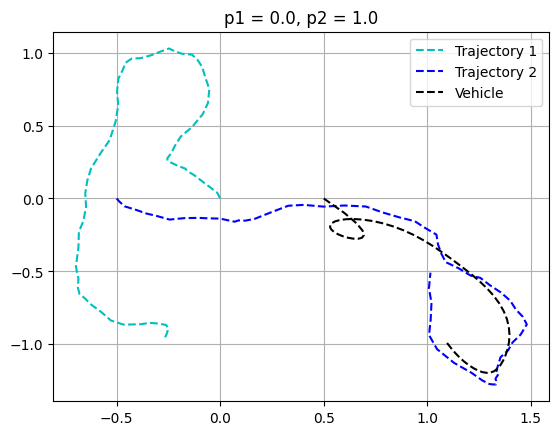

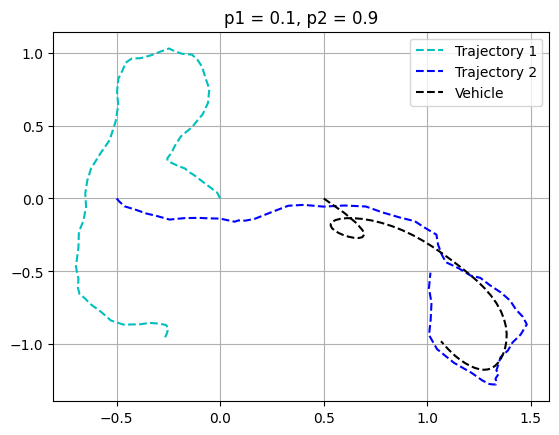

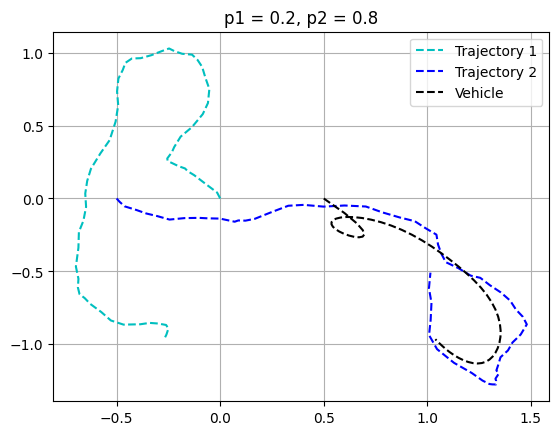

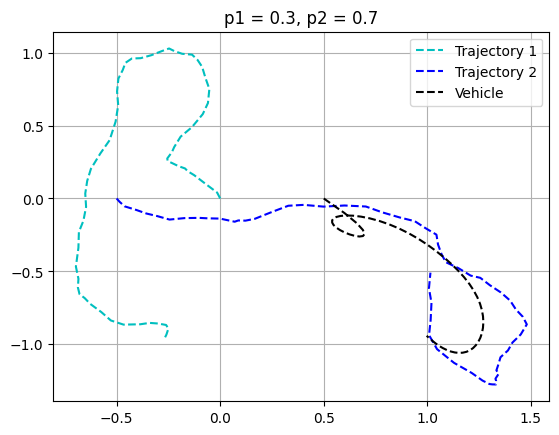

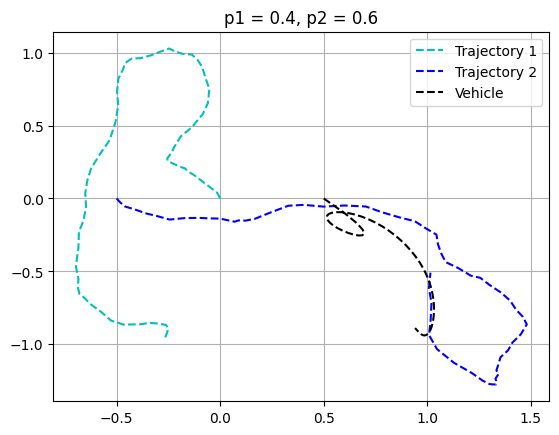

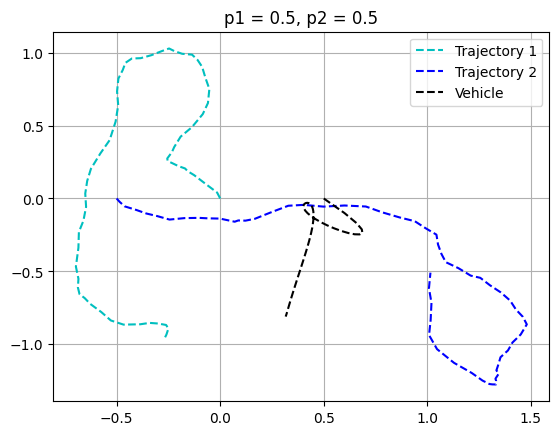

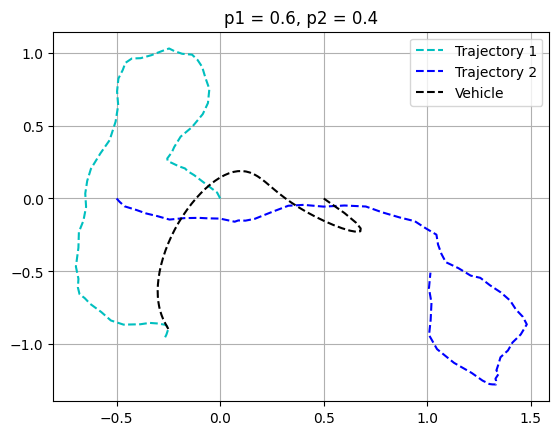

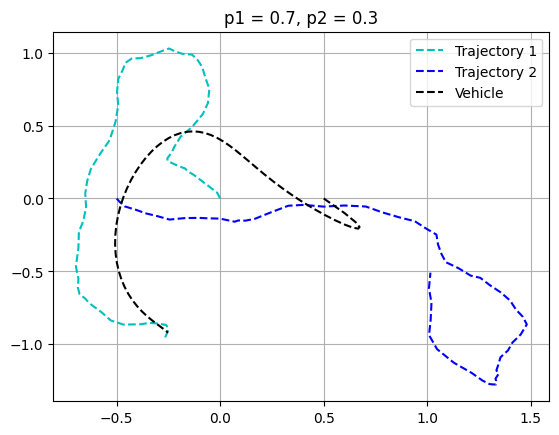

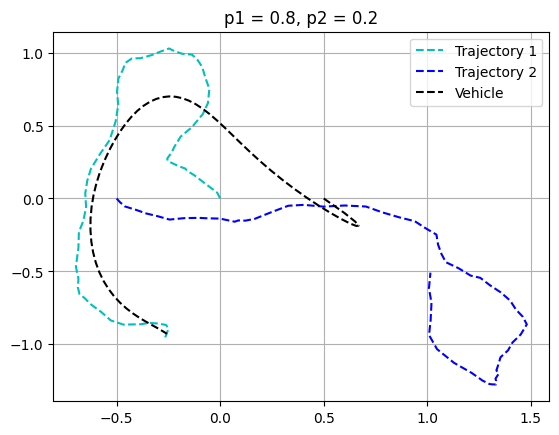

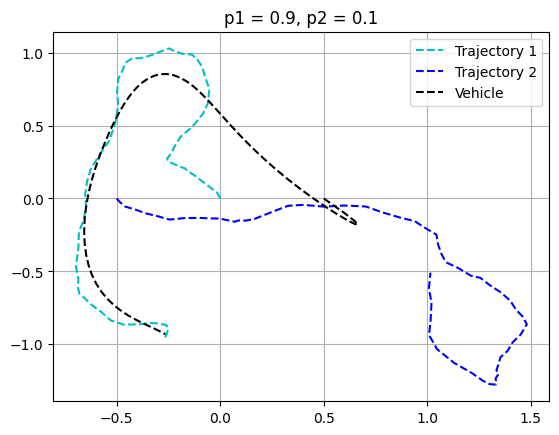

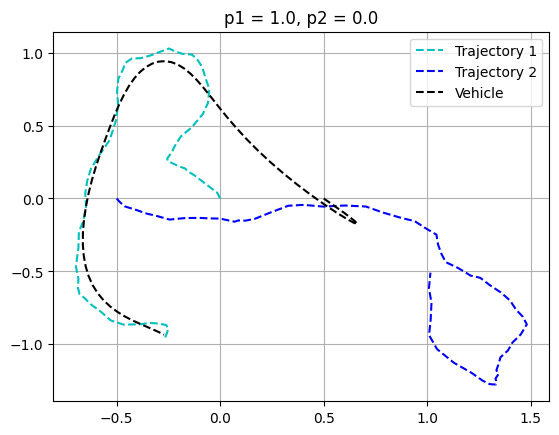

In [ ]:
T = q1.shape[0]

A = np.array([[1, 0, 0.1, 0],
              [0, 1, 0, 0.1],
              [0, 0, 0.8, 0],
              [0, 0, 0, 0.8]])

B = np.array([[0, 0],
              [0, 0],
              [0.1, 0],
              [0, 0.1]])

E = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

x_i= np.array([0.5, 0, 1, -1])
p = 0.1

probabilities = [(0.0, 1.0), (0.1, 0.9), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6), (0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1), (1.0, 0.0)]
results = []

for p1, p2 in probabilities:
    x = [cp.Variable(4) for _ in range(T)]
    u = [cp.Variable(2) for _ in range(T - 1)]

    constraints = [x[0] == x_i]
    for t in range(T - 1):
        constraints.append(x[t+1] == A @ x[t] + B @ u[t])

    TE1 = cp.sum([cp.norm(E @ x[t] - q1[t],2) for t in range(T)])
    TE2 = cp.sum([cp.norm(E @ x[t] - q2[t],2) for t in range(T)])
    CE = cp.sum([cp.norm(u[t],2)**2 for t in range(T - 1)])

    cost = p1 * TE1 + p2 * TE2 + p * CE
    prob = cp.Problem(cp.Minimize(cost), constraints)
    prob.solve()

    results.append({
        "p1": p1,
        "p2": p2,
        "trajectory": np.array([x[t].value[:2] for t in range(T)]),
        "TE": p1 * sum(np.linalg.norm(E @ x[t].value - q1[t]) for t in range(T)) +
              p2 * sum(np.linalg.norm(E @ x[t].value - q2[t]) for t in range(T)),
        "CE": sum(np.linalg.norm(u[t].value)**2 for t in range(T - 1))
    })

for i, r in enumerate(results):
    plt.figure()
    plt.plot(q1[:,0], q1[:,1], 'c--', label='Trajectory 1')
    plt.plot(q2[:,0], q2[:,1], 'b--', label='Trajectory 2')
    plt.plot(r["trajectory"][:,0], r["trajectory"][:,1], 'k--', label='Vehicle')
    plt.title(f"p1 = {r['p1']}, p2 = {r['p2']}")
    plt.legend()
    plt.grid()



In [7]:
print(q1.shape)
print(q1[0])

(60, 2)
[0. 0.]
